###  Enter USERNAME and get CODEFORCES submission summary

In [1]:
USERNAME = 'kartikeya_singh'

In [2]:
import urllib.request
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

In [3]:
%matplotlib notebook

In [4]:
def get_url(pg_num):
    return "http://codeforces.com/submissions/" + USERNAME + "/page/" + str(pg_num)

In [5]:
def get_html_string(pg_num):

    fp         = urllib.request.urlopen(get_url(pg_num))
    data_bytes = fp.read()
    data_str   = data_bytes.decode("utf8")
    fp.close()

    return data_str

In [6]:
def get_parsed_html(pg_num):
    parsed_html = BeautifulSoup(get_html_string(pg_num), 'html.parser')
    
    return parsed_html

In [7]:
def get_row_count(pg_html, substring):
    
    return str(pg_html.find_all("div", {"class" : "datatable"})[0]).count(substring)

In [8]:
def print_text_summary(pg_num, rows_in_pg, ac_in_pg, wrong_in_pg, tle_in_pg):
    print("Summary of submission page {} of username {}\n".format(pg_num, USERNAME))
    print(("Total submissions {}\n"
           "Accepted submissions {}\n"
           "Wrong submissions {}\n"
           "TLE submissions {}\n").format(rows_in_pg, 
                                          ac_in_pg,
                                          wrong_in_pg,
                                          tle_in_pg))

In [9]:
def get_submissions():
    total_submissions    = 0
    accepted_submissions = 0
    wrong_submissions    = 0
    tle_submissions      = 0
    
    for pg_num in range(1, 200):
        
        pg_html = get_parsed_html(pg_num)
        # Get total submissions
        rows_in_pg         = get_row_count(pg_html, "data-submission-id")
        total_submissions += rows_in_pg
        # Get accepted submissions 
        ac_in_pg              = get_row_count(pg_html, "OK")
        accepted_submissions += ac_in_pg
        # Get wrong submissions 
        wrong_in_pg        = get_row_count(pg_html, "WRONG_ANSWER")
        wrong_submissions += wrong_in_pg
        # Get TLE submissions 
        tle_in_pg        = get_row_count(pg_html, "TIME_LIMIT_EXCEEDED")
        tle_submissions += tle_in_pg
        
#         print_text_summary(pg_num, rows_in_pg, ac_in_pg, wrong_in_pg, tle_in_pg)
        
        if rows_in_pg < 50:
            break

    return (total_submissions, accepted_submissions, wrong_submissions, tle_submissions)

In [10]:
t_s, a_s, w_s, tle_s = get_submissions()
o_s                  = t_s - (a_s + w_s + tle_s)

In [11]:
print(("Total submissions {}\n"
       "Accepted submissions {}\n"
       "Wrong submissions {}\n"
       "TLE submissions {}\n").format(t_s, a_s, w_s, tle_s))

Total submissions 316
Accepted submissions 186
Wrong submissions 96
TLE submissions 20



<IPython.core.display.Javascript object>


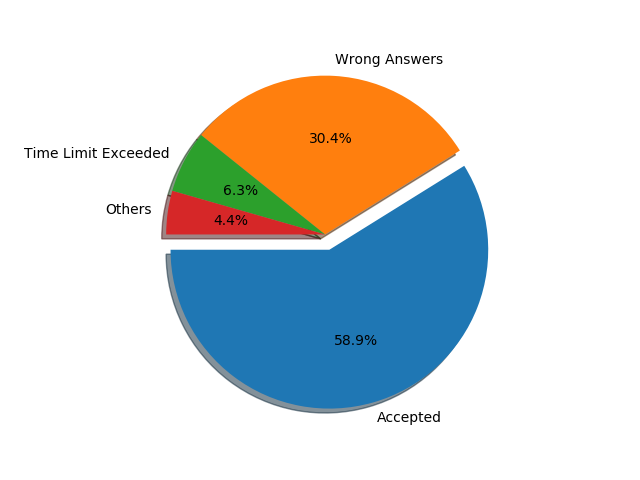

In [12]:
labels    = 'Accepted', 'Wrong Answers', 'Time Limit Exceeded', 'Others'
sizes     = [a_s, w_s, tle_s, o_s]
explode   = (0.1, 0, 0, 0)
fig1, ax1 = plt.subplots()

ax1.pie(sizes, 
        explode   =explode, 
        labels    =labels, 
        autopct   ='%1.1f%%',
        shadow    =True, 
        startangle=180)

ax1.axis('equal')
plt.show()